In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, classification_report

import time

In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [6]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [9]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [11]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()

In [17]:
time_data = []
acc = []

In [18]:
def mymodel(model):
    start = time.time()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = accuracy_score(ytest, ypred)
    cr = classification_report(ytest, ypred)
    end = time.time()
    time_taken = end - start
    time_data.append(time_taken)
    acc.append(ac)
    print(f"Accuracy: {ac} \n Classification report: {cr}")

In [21]:
mymodel(logreg)

Accuracy: 0.7541424093148231 
 Classification report:               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1146
           1       0.77      0.71      0.74      1087

    accuracy                           0.75      2233
   macro avg       0.76      0.75      0.75      2233
weighted avg       0.76      0.75      0.75      2233



In [24]:
mymodel(knn)

Accuracy: 0.742498880429915 
 Classification report:               precision    recall  f1-score   support

           0       0.74      0.77      0.75      1146
           1       0.74      0.72      0.73      1087

    accuracy                           0.74      2233
   macro avg       0.74      0.74      0.74      2233
weighted avg       0.74      0.74      0.74      2233



In [25]:
mymodel(svm)

Accuracy: 0.7321988356471115 
 Classification report:               precision    recall  f1-score   support

           0       0.70      0.82      0.76      1146
           1       0.77      0.63      0.70      1087

    accuracy                           0.73      2233
   macro avg       0.74      0.73      0.73      2233
weighted avg       0.74      0.73      0.73      2233



In [26]:
mymodel(dt)

Accuracy: 0.7836990595611285 
 Classification report:               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1146
           1       0.79      0.76      0.77      1087

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



In [27]:
df_stats = pd.DataFrame({'Model':['logistic','knn','svm','dt'],
                        'Time taken in second':time_data,
                        'Accuracy':acc})

In [28]:
df_stats

,Model,Time taken in second,Accuracy
0,logistic,0.184470,0.754142
1,knn,0.422772,0.742499
2,svm,5.257208,0.732199
3,dt,0.060597,0.783699


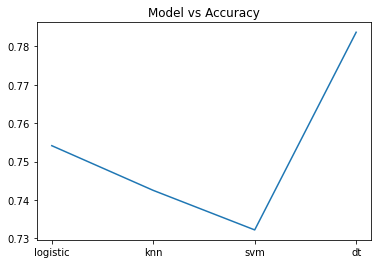

In [38]:
plt.figure(figsize = (6,4))
plt.plot(df_stats['Model'], df_stats['Accuracy'])
plt.title("Model vs Accuracy")
plt.show()

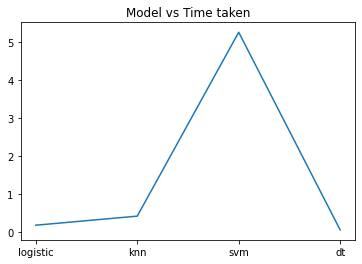

In [36]:
plt.figure(figsize = (6,4))
plt.plot(df_stats['Model'], df_stats['Time taken in second'])
plt.title("Model vs Time taken")
plt.show()

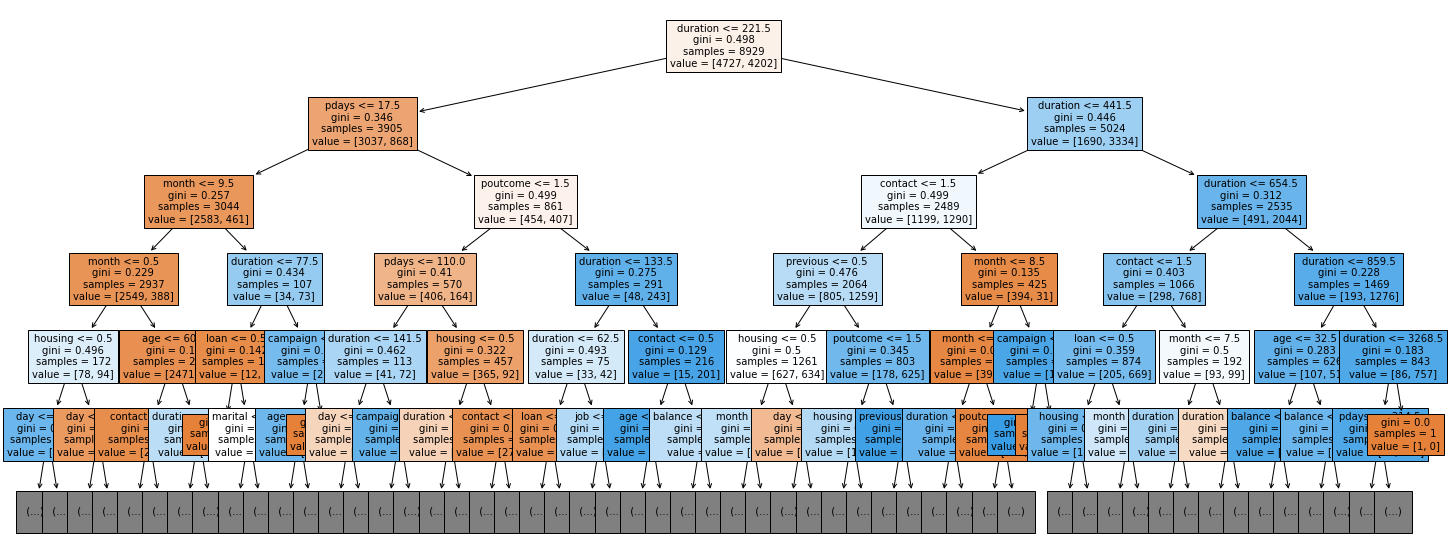

In [40]:
plt.figure(figsize=(25,10))
chart = tree.plot_tree(dt, max_depth = 5, feature_names = x.columns, filled = True, fontsize = 10)
plt.savefig('decision tree.png')

In [41]:
# Checking for overfitting

In [42]:
dt.score(xtrain, ytrain)

1.0

In [43]:
dt.score(xtest, ytest)

0.7836990595611285

In [44]:
# accuracy of training is very high and accuracy of testing is relatively low.
# this is a case of low bias and high variance
# this implies that it is a case of over fitting

# Hyper Tuning DT

In [45]:
# Hyper parameters with impurity checker Gini

# Max Depth of Tree

In [47]:
# Max Depth
accuracy_1 = []
max_depth_value = []

for i in range(1, 30):
    dt_1 = DecisionTreeClassifier(max_depth=i)
    dt_1.fit(xtrain, ytrain)
    ypred_1 = dt_1.predict(xtest)
    ac_1 = accuracy_score(ytest, ypred_1)
    accuracy_1.append(ac_1)
    max_depth_value.append(i)
    print(f"max_depth = {i}, accuracy = {ac_1}")

max_depth = 1, accuracy = 0.7098074339453649
max_depth = 2, accuracy = 0.7098074339453649
max_depth = 3, accuracy = 0.7760859829825347
max_depth = 4, accuracy = 0.77384684281236
max_depth = 5, accuracy = 0.8016121809225257
max_depth = 6, accuracy = 0.8087774294670846
max_depth = 7, accuracy = 0.8096730855351545
max_depth = 8, accuracy = 0.8150470219435737
max_depth = 9, accuracy = 0.8132557098074339
max_depth = 10, accuracy = 0.8154948499776086
max_depth = 11, accuracy = 0.8083296014330497
max_depth = 12, accuracy = 0.8114643976712942
max_depth = 13, accuracy = 0.8096730855351545
max_depth = 14, accuracy = 0.8060904612628751
max_depth = 15, accuracy = 0.799373040752351
max_depth = 16, accuracy = 0.7944469323779668
max_depth = 17, accuracy = 0.7913121361397224
max_depth = 18, accuracy = 0.7895208240035826
max_depth = 19, accuracy = 0.7796686072548141
max_depth = 20, accuracy = 0.7881773399014779
max_depth = 21, accuracy = 0.786833855799373
max_depth = 22, accuracy = 0.7859381997313032
m

In [48]:
df_max_depth = pd.DataFrame({'max_depth':max_depth_value, 'Accuracy':accuracy_1})

In [67]:
#the first point after which accuracy decrease
# it is in max_depth = 11

In [68]:
# checking for over fitting
dt_2 = DecisionTreeClassifier(max_depth = 11)
dt_2.fit(xtrain, ytrain)
ypred_2 = dt_2.predict(xtest)
ac_2 = accuracy_score(ytest, ypred_2)
print(f"accuracy = {ac_2}")

accuracy = 0.8069861173309449


In [69]:
dt_2.score(xtrain, ytrain)

0.9072684511143465

In [70]:
dt_2.score(xtest, ytest)

0.8069861173309449

In [71]:
# we have succesfully reduced the scenario of over fitting

# Min Sample Split

In [62]:
# Min sample split
accuracy_3 = []
min_sample_split_value = []

for i in range(2, 200):
    dt_3 = DecisionTreeClassifier(min_samples_split = i)
    dt_3.fit(xtrain, ytrain)
    ypred_3 = dt_3.predict(xtest)
    ac_3 = accuracy_score(ytest, ypred_3)
    accuracy_3.append(ac_3)
    min_sample_split_value.append(i)
    print(f"min_sample_split_value = {i}, accuracy = {ac_3}")

min_sample_split_value = 2, accuracy = 0.7908643081056874
min_sample_split_value = 3, accuracy = 0.7819077474249888
min_sample_split_value = 4, accuracy = 0.7841468875951635
min_sample_split_value = 5, accuracy = 0.7845947156291984
min_sample_split_value = 6, accuracy = 0.7845947156291984
min_sample_split_value = 7, accuracy = 0.7845947156291984
min_sample_split_value = 8, accuracy = 0.781012091356919
min_sample_split_value = 9, accuracy = 0.7823555754590238
min_sample_split_value = 10, accuracy = 0.7836990595611285
min_sample_split_value = 11, accuracy = 0.7850425436632333
min_sample_split_value = 12, accuracy = 0.7877295118674429
min_sample_split_value = 13, accuracy = 0.7953425884460367
min_sample_split_value = 14, accuracy = 0.793999104343932
min_sample_split_value = 15, accuracy = 0.799373040752351
min_sample_split_value = 16, accuracy = 0.799373040752351
min_sample_split_value = 17, accuracy = 0.8011643528884909
min_sample_split_value = 18, accuracy = 0.799373040752351
min_sample

min_sample_split_value = 146, accuracy = 0.8159426780116436
min_sample_split_value = 147, accuracy = 0.8163905060456784
min_sample_split_value = 148, accuracy = 0.8114643976712942
min_sample_split_value = 149, accuracy = 0.8114643976712942
min_sample_split_value = 150, accuracy = 0.8114643976712942
min_sample_split_value = 151, accuracy = 0.8114643976712942
min_sample_split_value = 152, accuracy = 0.8114643976712942
min_sample_split_value = 153, accuracy = 0.8114643976712942
min_sample_split_value = 154, accuracy = 0.8092252575011196
min_sample_split_value = 155, accuracy = 0.8092252575011196
min_sample_split_value = 156, accuracy = 0.8092252575011196
min_sample_split_value = 157, accuracy = 0.8092252575011196
min_sample_split_value = 158, accuracy = 0.8092252575011196
min_sample_split_value = 159, accuracy = 0.8092252575011196
min_sample_split_value = 160, accuracy = 0.8092252575011196
min_sample_split_value = 161, accuracy = 0.8092252575011196
min_sample_split_value = 162, accuracy =

In [88]:
diff = ['not valid']
for j in range(1,len(df_min_sample_split)):
    delta = df_min_sample_split['Accuracy'].iloc[j,] - df_min_sample_split['Accuracy'].iloc[j-1,]
    diff.append(delta)

In [90]:
df_min_sample_split['change'] = diff

In [92]:
print(df_min_sample_split.to_string())

     sample_split  Accuracy     change
0               2  0.790864  not valid
1               3  0.781908  -0.008957
2               4  0.784147   0.002239
3               5  0.784595   0.000448
4               6  0.784595        0.0
5               7  0.784595        0.0
6               8  0.781012  -0.003583
7               9  0.782356   0.001343
8              10  0.783699   0.001343
9              11  0.785043   0.001343
10             12  0.787730   0.002687
11             13  0.795343   0.007613
12             14  0.793999  -0.001343
13             15  0.799373   0.005374
14             16  0.799373        0.0
15             17  0.801164   0.001791
16             18  0.799373  -0.001791
17             19  0.792656  -0.006717
18             20  0.794447   0.001791
19             21  0.794447        0.0
20             22  0.795343   0.000896
21             23  0.797134   0.001791
22             24  0.798925   0.001791
23             25  0.799821   0.000896
24             26  0.7989

In [93]:
# at min sample split of 81, we can see that accuracy increases later

In [94]:
# checking for over fitting
dt_4 = DecisionTreeClassifier(min_samples_split = 81)
dt_4.fit(xtrain, ytrain)
ypred_4 = dt_4.predict(xtest)
ac_4 = accuracy_score(ytest, ypred_4)
print(f"accuracy = {ac_4}")

accuracy = 0.8235557545902373


In [95]:
dt_4.score(xtrain, ytrain)

0.8561989024526823

In [96]:
dt_4.score(xtest, ytest)

0.8235557545902373

In [97]:
# here we can see that the training score has dipped from 100 to 85.61
# so min sample split reduces over fitting in a better way as compare to max depth

# Min Sample Leaf

In [100]:
# Min sample leaf
accuracy_5 = []
min_sample_leaf_value = []

for i in range(1, 200):
    dt_5 = DecisionTreeClassifier(min_samples_leaf= i)
    dt_5.fit(xtrain, ytrain)
    ypred_5 = dt_5.predict(xtest)
    ac_5 = accuracy_score(ytest, ypred_5)
    accuracy_5.append(ac_5)
    min_sample_leaf_value.append(i)
    print(f"min_sample_leaf_value = {i}, accuracy = {ac_5}")

min_sample_leaf_value = 1, accuracy = 0.7904164800716524
min_sample_leaf_value = 2, accuracy = 0.7859381997313032
min_sample_leaf_value = 3, accuracy = 0.7854903716972682
min_sample_leaf_value = 4, accuracy = 0.7841468875951635
min_sample_leaf_value = 5, accuracy = 0.7899686520376176
min_sample_leaf_value = 6, accuracy = 0.7890729959695477
min_sample_leaf_value = 7, accuracy = 0.7980295566502463
min_sample_leaf_value = 8, accuracy = 0.8047469771607703
min_sample_leaf_value = 9, accuracy = 0.8101209135691895
min_sample_leaf_value = 10, accuracy = 0.8114643976712942
min_sample_leaf_value = 11, accuracy = 0.8150470219435737
min_sample_leaf_value = 12, accuracy = 0.8096730855351545
min_sample_leaf_value = 13, accuracy = 0.8132557098074339
min_sample_leaf_value = 14, accuracy = 0.8172861621137483
min_sample_leaf_value = 15, accuracy = 0.8154948499776086
min_sample_leaf_value = 16, accuracy = 0.8186296462158531
min_sample_leaf_value = 17, accuracy = 0.825347066726377
min_sample_leaf_value = 

min_sample_leaf_value = 144, accuracy = 0.8042991491267353
min_sample_leaf_value = 145, accuracy = 0.8042991491267353
min_sample_leaf_value = 146, accuracy = 0.8042991491267353
min_sample_leaf_value = 147, accuracy = 0.8042991491267353
min_sample_leaf_value = 148, accuracy = 0.8042991491267353
min_sample_leaf_value = 149, accuracy = 0.8042991491267353
min_sample_leaf_value = 150, accuracy = 0.8042991491267353
min_sample_leaf_value = 151, accuracy = 0.8042991491267353
min_sample_leaf_value = 152, accuracy = 0.8038513210927004
min_sample_leaf_value = 153, accuracy = 0.8038513210927004
min_sample_leaf_value = 154, accuracy = 0.8038513210927004
min_sample_leaf_value = 155, accuracy = 0.8038513210927004
min_sample_leaf_value = 156, accuracy = 0.8038513210927004
min_sample_leaf_value = 157, accuracy = 0.8038513210927004
min_sample_leaf_value = 158, accuracy = 0.8038513210927004
min_sample_leaf_value = 159, accuracy = 0.8038513210927004
min_sample_leaf_value = 160, accuracy = 0.80385132109270

In [101]:
df_leaf = pd.DataFrame({'leaf_value':min_sample_leaf_value, 'accuracy':accuracy_5})

In [103]:
df_leaf

,leaf_value,accuracy
0,1,0.790416
1,2,0.785938
2,3,0.785490
3,4,0.784147
4,5,0.789969
...,...,...
194,195,0.798925
195,196,0.798925
196,197,0.798925
197,198,0.798925


In [104]:
diff_5 = ['not valid']
for j in range(1,len(df_leaf)):
    delta = df_leaf['accuracy'].iloc[j,] - df_leaf['accuracy'].iloc[j-1,]
    diff_5.append(delta)

In [105]:
df_leaf['change'] = diff_5

In [106]:
print(df_leaf.to_string())

     leaf_value  accuracy     change
0             1  0.790416  not valid
1             2  0.785938  -0.004478
2             3  0.785490  -0.000448
3             4  0.784147  -0.001343
4             5  0.789969   0.005822
5             6  0.789073  -0.000896
6             7  0.798030   0.008957
7             8  0.804747   0.006717
8             9  0.810121   0.005374
9            10  0.811464   0.001343
10           11  0.815047   0.003583
11           12  0.809673  -0.005374
12           13  0.813256   0.003583
13           14  0.817286    0.00403
14           15  0.815495  -0.001791
15           16  0.818630   0.003135
16           17  0.825347   0.006717
17           18  0.817286  -0.008061
18           19  0.817286        0.0
19           20  0.817734   0.000448
20           21  0.820421   0.002687
21           22  0.822660   0.002239
22           23  0.824451   0.001791
23           24  0.819973  -0.004478
24           25  0.820869   0.000896
25           26  0.824004   0.003135
2

In [107]:
#the value changes after leaf value = 6

In [109]:
# checking for over fitting
dt_6 = DecisionTreeClassifier(min_samples_leaf = 6)
dt_6.fit(xtrain, ytrain)
ypred_6 = dt_6.predict(xtest)
ac_6 = accuracy_score(ytest, ypred_6)
print(f"accuracy = {ac_6}")

accuracy = 0.7904164800716524


In [110]:
dt_6.score(xtrain, ytrain)

0.9017807145257027

In [111]:
dt_6.score(xtest, ytest)

0.7904164800716524

In [112]:
# looking at all the 3 scores post pruning techniques, we can see that,
# we got the best result of reducing overfitting by tuning
# min sample split